# Probability Distributions - Interactive Learning Notebook

**Author:** Md Ayan Alam  
**Roll Number:** GF202342645  
**Course:** Statistical Foundation of Data Science

---

## Learning Objectives

By the end of this notebook, you will be able to:
1. Understand different types of probability distributions
2. Work with discrete and continuous distributions
3. Calculate probabilities and generate random samples
4. Visualize and compare distribution properties
5. Apply distributions to real-world scenarios

---

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import (
    norm, uniform, expon, binom, poisson, bernoulli,
    chi2, t, f, gamma, beta, lognorm
)
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
sns.set_style("whitegrid")

print("📈 Libraries imported successfully!")
print("🎲 Ready for probability distributions exploration!")

📈 Libraries imported successfully!
🎲 Ready for probability distributions exploration!


## 1. Discrete Probability Distributions

Discrete distributions deal with countable outcomes.

🎯 Bernoulli Distribution (Single Trial)
Examples: Coin flip, Pass/Fail, Success/Failure

Parameters: p = 0.3
P(X = 0) = 0.700
P(X = 1) = 0.300
Mean: 0.300
Variance: 0.210


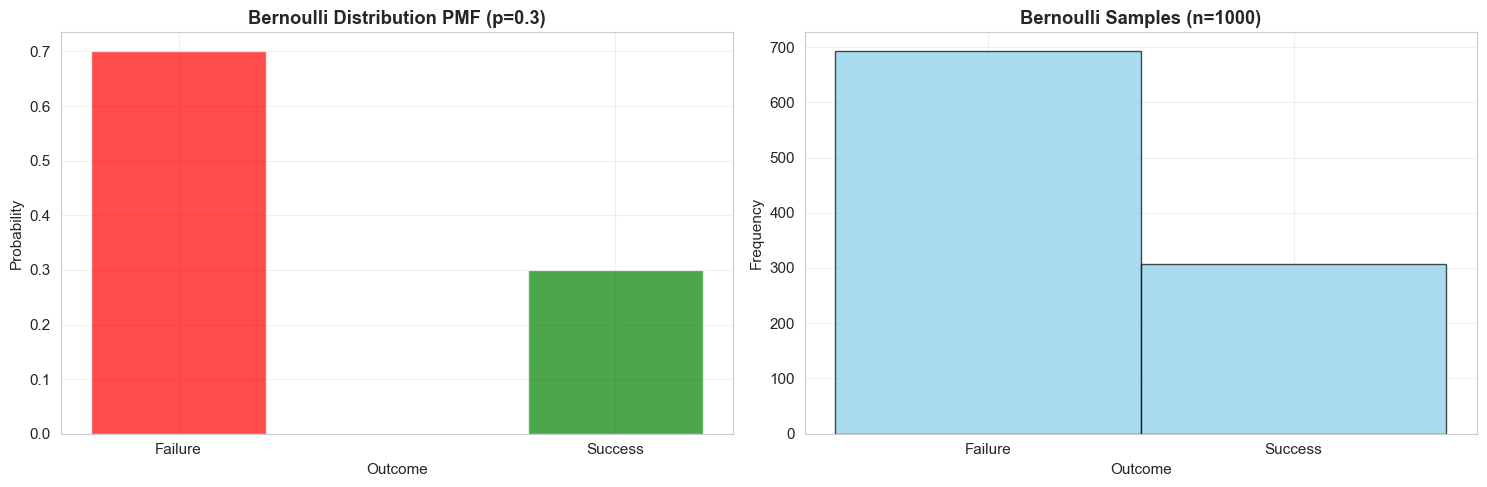

In [2]:
# 1.1 Bernoulli Distribution
print("🎯 Bernoulli Distribution (Single Trial)")
print("Examples: Coin flip, Pass/Fail, Success/Failure")

# Parameters
p_success = 0.3  # Probability of success

# Generate samples
bernoulli_samples = bernoulli.rvs(p=p_success, size=1000)

# Calculate probabilities
prob_0 = bernoulli.pmf(0, p_success)  # P(X = 0)
prob_1 = bernoulli.pmf(1, p_success)  # P(X = 1)

print(f"\nParameters: p = {p_success}")
print(f"P(X = 0) = {prob_0:.3f}")
print(f"P(X = 1) = {prob_1:.3f}")
print(f"Mean: {bernoulli.mean(p_success):.3f}")
print(f"Variance: {bernoulli.var(p_success):.3f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# PMF
x_vals = [0, 1]
pmf_vals = [prob_0, prob_1]
axes[0].bar(x_vals, pmf_vals, color=['red', 'green'], alpha=0.7, width=0.4)
axes[0].set_title(f'Bernoulli Distribution PMF (p={p_success})', fontweight='bold')
axes[0].set_xlabel('Outcome')
axes[0].set_ylabel('Probability')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Failure', 'Success'])
axes[0].grid(True, alpha=0.3)

# Sample histogram
axes[1].hist(bernoulli_samples, bins=[-0.5, 0.5, 1.5], alpha=0.7, color='skyblue', edgecolor='black')
axes[1].set_title('Bernoulli Samples (n=1000)', fontweight='bold')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Failure', 'Success'])
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


🎯 Binomial Distribution (Multiple Trials)
Examples: Number of heads in 10 coin flips, Number of defective items in a batch

Parameters: n = 20, p = 0.3
Mean: 6.000
Variance: 4.200
P(X = 5) = 0.1789
P(X < 5) = 0.2375
P(X > 10) = 0.0171


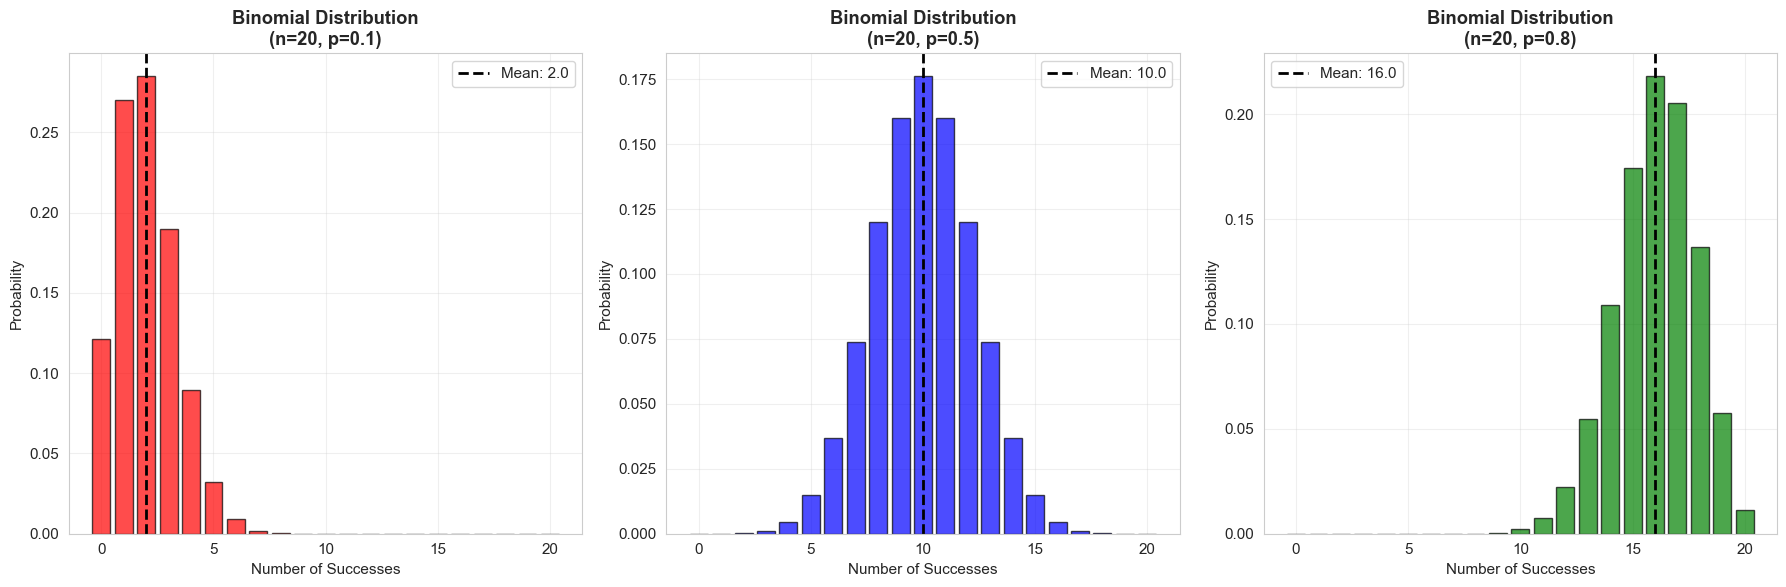

In [3]:
# 1.2 Binomial Distribution
print("\n🎯 Binomial Distribution (Multiple Trials)")
print("Examples: Number of heads in 10 coin flips, Number of defective items in a batch")

# Parameters
n_trials = 20  # Number of trials
p_success = 0.3  # Probability of success per trial

# Generate range of possible values
x_range = np.arange(0, n_trials + 1)

# Calculate PMF
pmf_values = binom.pmf(x_range, n_trials, p_success)

# Calculate some probabilities
prob_exact_5 = binom.pmf(5, n_trials, p_success)
prob_less_than_5 = binom.cdf(4, n_trials, p_success)
prob_more_than_10 = 1 - binom.cdf(10, n_trials, p_success)

print(f"\nParameters: n = {n_trials}, p = {p_success}")
print(f"Mean: {binom.mean(n_trials, p_success):.3f}")
print(f"Variance: {binom.var(n_trials, p_success):.3f}")
print(f"P(X = 5) = {prob_exact_5:.4f}")
print(f"P(X < 5) = {prob_less_than_5:.4f}")
print(f"P(X > 10) = {prob_more_than_10:.4f}")

# Visualize different binomial distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Different probability values
p_values = [0.1, 0.5, 0.8]
colors = ['red', 'blue', 'green']

for i, (p, color) in enumerate(zip(p_values, colors)):
    pmf_vals = binom.pmf(x_range, n_trials, p)
    axes[i].bar(x_range, pmf_vals, alpha=0.7, color=color, edgecolor='black')
    axes[i].set_title(f'Binomial Distribution\n(n={n_trials}, p={p})', fontweight='bold')
    axes[i].set_xlabel('Number of Successes')
    axes[i].set_ylabel('Probability')
    axes[i].grid(True, alpha=0.3)

    # Add mean line
    mean_val = n_trials * p
    axes[i].axvline(mean_val, color='black', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    axes[i].legend()

plt.tight_layout()
plt.show()


🎯 Poisson Distribution (Rate of Events)
Examples: Number of emails per hour, Number of accidents per day, Number of customers per minute

λ = 1: Mean = 1.0, Variance = 1.0

λ = 4: Mean = 4.0, Variance = 4.0

λ = 10: Mean = 10.0, Variance = 10.0


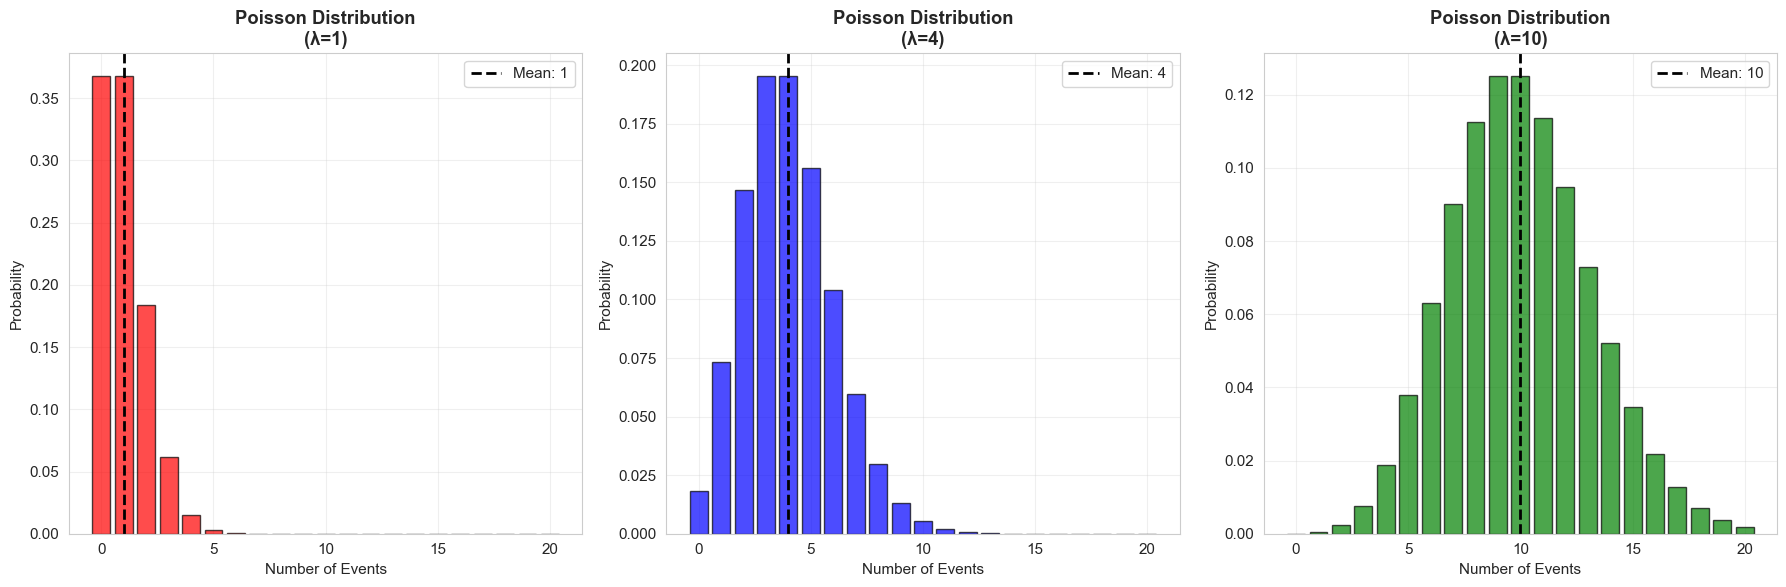


🏪 Real-world Example: Customer Arrivals at a Store
Average customers per 10 minutes: 3
P(no customers) = 0.0498
P(5 or more customers) = 0.1847


In [4]:
# 1.3 Poisson Distribution
print("\n🎯 Poisson Distribution (Rate of Events)")
print("Examples: Number of emails per hour, Number of accidents per day, Number of customers per minute")

# Parameters
lambda_values = [1, 4, 10]  # Average rate
x_max = 20
x_range = np.arange(0, x_max + 1)

# Visualize different Poisson distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
colors = ['red', 'blue', 'green']

for i, (lam, color) in enumerate(zip(lambda_values, colors)):
    pmf_vals = poisson.pmf(x_range, lam)

    axes[i].bar(x_range, pmf_vals, alpha=0.7, color=color, edgecolor='black')
    axes[i].set_title(f'Poisson Distribution\n(λ={lam})', fontweight='bold')
    axes[i].set_xlabel('Number of Events')
    axes[i].set_ylabel('Probability')
    axes[i].grid(True, alpha=0.3)

    # Add mean line (for Poisson, mean = λ)
    axes[i].axvline(lam, color='black', linestyle='--', linewidth=2, label=f'Mean: {lam}')
    axes[i].legend()

    # Display key statistics
    mean_val = poisson.mean(lam)
    var_val = poisson.var(lam)
    print(f"\nλ = {lam}: Mean = {mean_val:.1f}, Variance = {var_val:.1f}")

plt.tight_layout()
plt.show()

# Real-world example: Customer arrivals
print("\n🏪 Real-world Example: Customer Arrivals at a Store")
lambda_customers = 3  # Average 3 customers per 10-minute interval

# Calculate probabilities
prob_0_customers = poisson.pmf(0, lambda_customers)
prob_5_or_more = 1 - poisson.cdf(4, lambda_customers)

print(f"Average customers per 10 minutes: {lambda_customers}")
print(f"P(no customers) = {prob_0_customers:.4f}")
print(f"P(5 or more customers) = {prob_5_or_more:.4f}")

## 2. Continuous Probability Distributions

Continuous distributions deal with measurements on a continuous scale.

🎯 Normal Distribution (The Bell Curve)
Examples: Heights, Test scores, Measurement errors


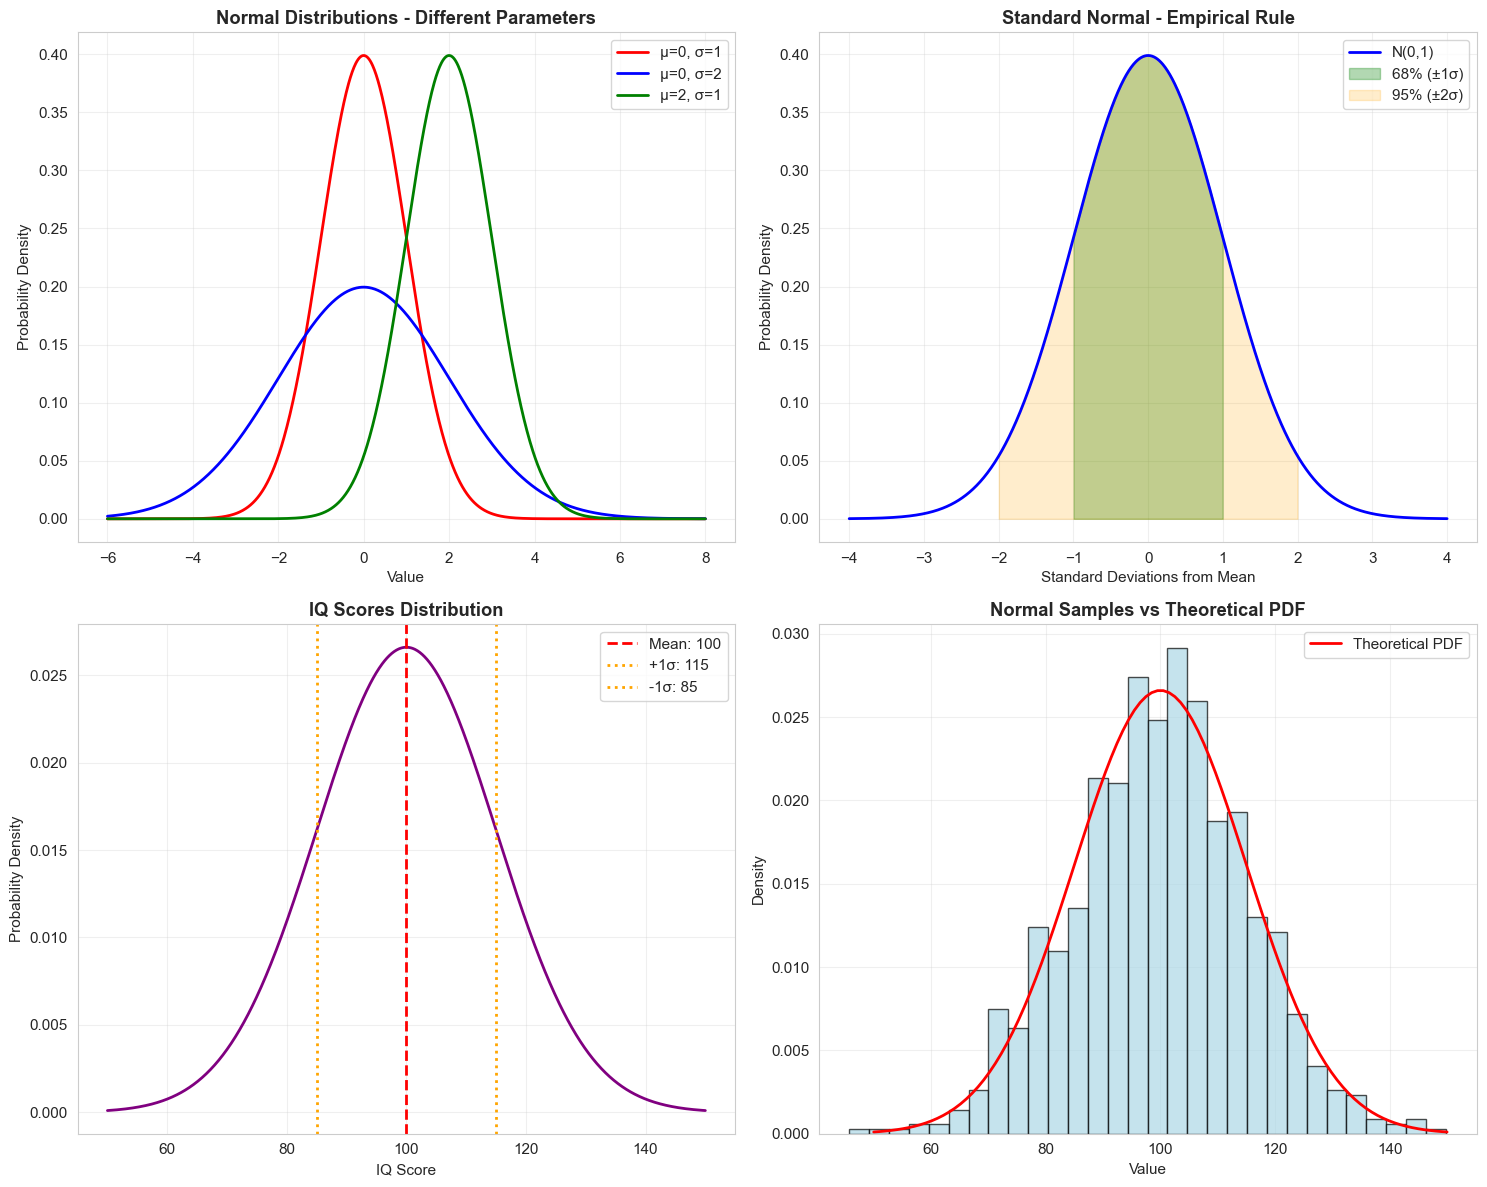


📊 Normal Distribution Calculations (μ=100, σ=15):
P(X < 115) = 0.8413
P(X > 130) = 0.0228
P(85 < X < 115) = 0.6827
95th percentile = 124.67


In [5]:
# 2.1 Normal Distribution
print("🎯 Normal Distribution (The Bell Curve)")
print("Examples: Heights, Test scores, Measurement errors")

# Parameters
mu_values = [0, 0, 2]     # Means
sigma_values = [1, 2, 1]  # Standard deviations
x_range = np.linspace(-6, 8, 1000)

# Plot different normal distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Different normal distributions
colors = ['red', 'blue', 'green']
for i, (mu, sigma, color) in enumerate(zip(mu_values, sigma_values, colors)):
    pdf_vals = norm.pdf(x_range, mu, sigma)
    axes[0, 0].plot(x_range, pdf_vals, color=color, linewidth=2,
                   label=f'μ={mu}, σ={sigma}')

axes[0, 0].set_title('Normal Distributions - Different Parameters', fontweight='bold')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Probability Density')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Standard normal distribution with areas
x_std = np.linspace(-4, 4, 1000)
pdf_std = norm.pdf(x_std, 0, 1)
axes[0, 1].plot(x_std, pdf_std, 'b-', linewidth=2, label='N(0,1)')

# Shade areas for empirical rule
x_1sd = x_std[np.abs(x_std) <= 1]
pdf_1sd = norm.pdf(x_1sd, 0, 1)
axes[0, 1].fill_between(x_1sd, 0, pdf_1sd, alpha=0.3, color='green', label='68% (±1σ)')

x_2sd = x_std[np.abs(x_std) <= 2]
pdf_2sd = norm.pdf(x_2sd, 0, 1)
axes[0, 1].fill_between(x_2sd, 0, pdf_2sd, alpha=0.2, color='orange', label='95% (±2σ)')

axes[0, 1].set_title('Standard Normal - Empirical Rule', fontweight='bold')
axes[0, 1].set_xlabel('Standard Deviations from Mean')
axes[0, 1].set_ylabel('Probability Density')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Z-score example
mu, sigma = 100, 15  # IQ scores example
x_iq = np.linspace(50, 150, 1000)
pdf_iq = norm.pdf(x_iq, mu, sigma)
axes[1, 0].plot(x_iq, pdf_iq, 'purple', linewidth=2)
axes[1, 0].axvline(mu, color='red', linestyle='--', linewidth=2, label=f'Mean: {mu}')
axes[1, 0].axvline(mu + sigma, color='orange', linestyle=':', linewidth=2, label=f'+1σ: {mu+sigma}')
axes[1, 0].axvline(mu - sigma, color='orange', linestyle=':', linewidth=2, label=f'-1σ: {mu-sigma}')
axes[1, 0].set_title('IQ Scores Distribution', fontweight='bold')
axes[1, 0].set_xlabel('IQ Score')
axes[1, 0].set_ylabel('Probability Density')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Normal samples histogram
normal_samples = norm.rvs(loc=100, scale=15, size=1000)
axes[1, 1].hist(normal_samples, bins=30, density=True, alpha=0.7, color='lightblue', edgecolor='black')
x_overlay = np.linspace(50, 150, 100)
pdf_overlay = norm.pdf(x_overlay, 100, 15)
axes[1, 1].plot(x_overlay, pdf_overlay, 'red', linewidth=2, label='Theoretical PDF')
axes[1, 1].set_title('Normal Samples vs Theoretical PDF', fontweight='bold')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate probabilities
print(f"\n📊 Normal Distribution Calculations (μ=100, σ=15):")
print(f"P(X < 115) = {norm.cdf(115, 100, 15):.4f}")
print(f"P(X > 130) = {1 - norm.cdf(130, 100, 15):.4f}")
print(f"P(85 < X < 115) = {norm.cdf(115, 100, 15) - norm.cdf(85, 100, 15):.4f}")
print(f"95th percentile = {norm.ppf(0.95, 100, 15):.2f}")

🎯 Other Important Continuous Distributions


AttributeError: 'int' object has no attribute 'pdf'

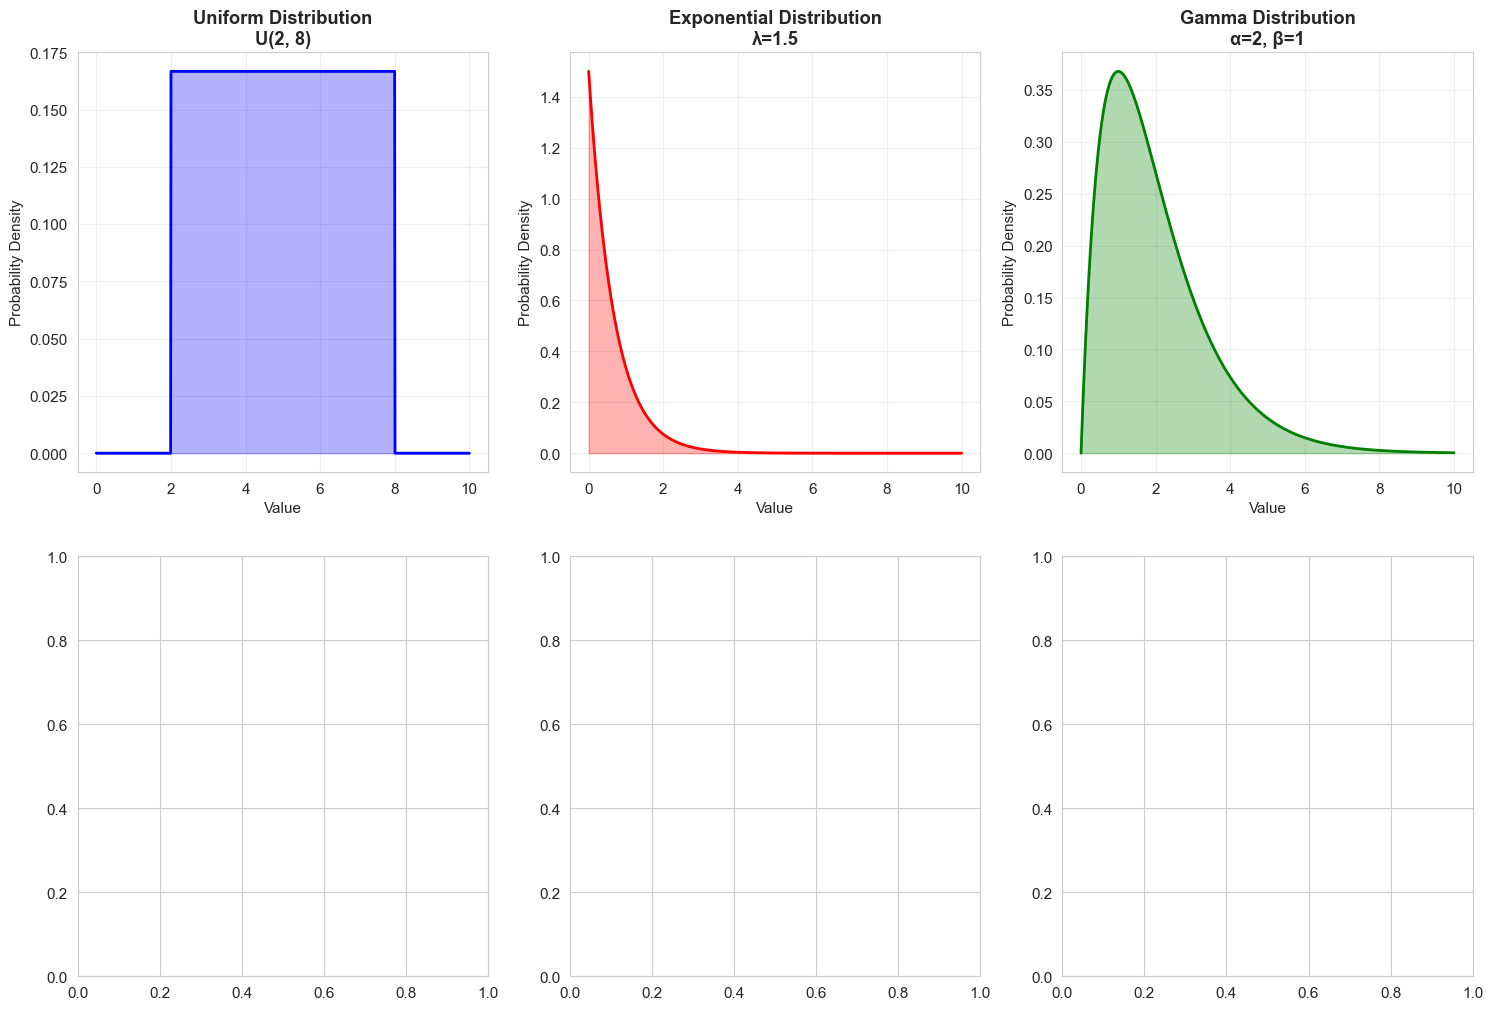

In [6]:
# 2.2 Other Important Continuous Distributions
print("🎯 Other Important Continuous Distributions")

x_range = np.linspace(0, 10, 1000)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Uniform Distribution
a, b = 2, 8  # Parameters
pdf_uniform = uniform.pdf(x_range, a, b-a)
axes[0, 0].plot(x_range, pdf_uniform, 'blue', linewidth=2)
axes[0, 0].fill_between(x_range, 0, pdf_uniform, alpha=0.3, color='blue')
axes[0, 0].set_title(f'Uniform Distribution\nU({a}, {b})', fontweight='bold')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Probability Density')
axes[0, 0].grid(True, alpha=0.3)

# Exponential Distribution
lambda_exp = 1.5  # Rate parameter
pdf_exp = expon.pdf(x_range, scale=1/lambda_exp)
axes[0, 1].plot(x_range, pdf_exp, 'red', linewidth=2)
axes[0, 1].fill_between(x_range, 0, pdf_exp, alpha=0.3, color='red')
axes[0, 1].set_title(f'Exponential Distribution\nλ={lambda_exp}', fontweight='bold')
axes[0, 1].set_xlabel('Value')
axes[0, 1].set_ylabel('Probability Density')
axes[0, 1].grid(True, alpha=0.3)

# Gamma Distribution
alpha, beta = 2, 1  # Shape and rate parameters
pdf_gamma = gamma.pdf(x_range, alpha, scale=1/beta)
axes[0, 2].plot(x_range, pdf_gamma, 'green', linewidth=2)
axes[0, 2].fill_between(x_range, 0, pdf_gamma, alpha=0.3, color='green')
axes[0, 2].set_title(f'Gamma Distribution\nα={alpha}, β={beta}', fontweight='bold')
axes[0, 2].set_xlabel('Value')
axes[0, 2].set_ylabel('Probability Density')
axes[0, 2].grid(True, alpha=0.3)

# Beta Distribution
x_beta = np.linspace(0, 1, 1000)
alpha_beta, beta_beta = 2, 5
pdf_beta = beta.pdf(x_beta, alpha_beta, beta_beta)
axes[1, 0].plot(x_beta, pdf_beta, 'purple', linewidth=2)
axes[1, 0].fill_between(x_beta, 0, pdf_beta, alpha=0.3, color='purple')
axes[1, 0].set_title(f'Beta Distribution\nα={alpha_beta}, β={beta_beta}', fontweight='bold')
axes[1, 0].set_xlabel('Value')
axes[1, 0].set_ylabel('Probability Density')
axes[1, 0].grid(True, alpha=0.3)

# Log-Normal Distribution
mu_log, sigma_log = 0, 0.5
pdf_lognorm = lognorm.pdf(x_range, sigma_log, scale=np.exp(mu_log))
axes[1, 1].plot(x_range, pdf_lognorm, 'orange', linewidth=2)
axes[1, 1].fill_between(x_range, 0, pdf_lognorm, alpha=0.3, color='orange')
axes[1, 1].set_title(f'Log-Normal Distribution\nμ={mu_log}, σ={sigma_log}', fontweight='bold')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Probability Density')
axes[1, 1].grid(True, alpha=0.3)

# Chi-Square Distribution
df_values = [1, 3, 5]
colors_chi = ['red', 'blue', 'green']
for df, color in zip(df_values, colors_chi):
    pdf_chi = chi2.pdf(x_range, df)
    axes[1, 2].plot(x_range, pdf_chi, color=color, linewidth=2, label=f'df={df}')
axes[1, 2].set_title('Chi-Square Distributions', fontweight='bold')
axes[1, 2].set_xlabel('Value')
axes[1, 2].set_ylabel('Probability Density')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print characteristics
print("\n📋 Distribution Characteristics:")
print(f"Uniform U({a},{b}): Mean = {uniform.mean(a, b-a):.2f}, Var = {uniform.var(a, b-a):.2f}")
print(f"Exponential (λ={lambda_exp}): Mean = {expon.mean(scale=1/lambda_exp):.2f}, Var = {expon.var(scale=1/lambda_exp):.2f}")
print(f"Gamma (α={alpha}, β={beta}): Mean = {gamma.mean(alpha, scale=1/beta):.2f}, Var = {gamma.var(alpha, scale=1/beta):.2f}")

## 3. Central Limit Theorem Demonstration

One of the most important theorems in statistics!

In [ ]:
# Central Limit Theorem Demonstration
print("🎯 Central Limit Theorem (CLT) Demonstration")
print("CLT: The sampling distribution of the mean approaches normal as sample size increases")

# Start with a non-normal distribution (exponential)
lambda_param = 2
sample_sizes = [1, 5, 15, 30]
n_samples = 1000

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Show original exponential distribution
x_orig = np.linspace(0, 6, 1000)
pdf_orig = expon.pdf(x_orig, scale=1/lambda_param)
samples_orig = expon.rvs(scale=1/lambda_param, size=5000)

axes[0, 0].plot(x_orig, pdf_orig, 'red', linewidth=2, label='Exponential PDF')
axes[0, 0].hist(samples_orig, bins=50, density=True, alpha=0.7, color='lightblue', edgecolor='black')
axes[0, 0].set_title('Original Distribution\n(Exponential)', fontweight='bold')
axes[0, 0].set_xlabel('Value')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Demonstrate CLT for different sample sizes
for i, n in enumerate(sample_sizes):
    # Generate sample means
    sample_means = []
    for _ in range(n_samples):
        sample = expon.rvs(scale=1/lambda_param, size=n)
        sample_means.append(np.mean(sample))

    sample_means = np.array(sample_means)

    # Plot histogram of sample means
    if i < 3:
        axes[0, i+1].hist(sample_means, bins=30, density=True, alpha=0.7,
                         color='lightgreen', edgecolor='black')
    else:
        axes[1, 0].hist(sample_means, bins=30, density=True, alpha=0.7,
                       color='lightgreen', edgecolor='black')

    # Overlay theoretical normal curve
    mean_of_means = np.mean(sample_means)
    std_of_means = np.std(sample_means)
    x_normal = np.linspace(mean_of_means - 4*std_of_means,
                          mean_of_means + 4*std_of_means, 100)
    pdf_normal = norm.pdf(x_normal, mean_of_means, std_of_means)

    if i < 3:
        axes[0, i+1].plot(x_normal, pdf_normal, 'red', linewidth=2,
                         label='Normal Approximation')
        axes[0, i+1].set_title(f'Sample Means\n(n={n})', fontweight='bold')
        axes[0, i+1].set_xlabel('Sample Mean')
        axes[0, i+1].set_ylabel('Density')
        axes[0, i+1].legend()
        axes[0, i+1].grid(True, alpha=0.3)
    else:
        axes[1, 0].plot(x_normal, pdf_normal, 'red', linewidth=2,
                       label='Normal Approximation')
        axes[1, 0].set_title(f'Sample Means\n(n={n})', fontweight='bold')
        axes[1, 0].set_xlabel('Sample Mean')
        axes[1, 0].set_ylabel('Density')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)

    # Theoretical values
    theoretical_mean = 1/lambda_param  # Mean of exponential
    theoretical_std = (1/lambda_param) / np.sqrt(n)  # Standard error

    print(f"\nn = {n}:")
    print(f"  Sample mean of means: {mean_of_means:.4f} (theoretical: {theoretical_mean:.4f})")
    print(f"  Sample std of means:  {std_of_means:.4f} (theoretical: {theoretical_std:.4f})")

# Show Q-Q plots for normality assessment
for i, n in enumerate([5, 30]):
    sample_means = []
    for _ in range(n_samples):
        sample = expon.rvs(scale=1/lambda_param, size=n)
        sample_means.append(np.mean(sample))

    stats.probplot(sample_means, dist="norm", plot=axes[1, i+1])
    axes[1, i+1].set_title(f'Q-Q Plot (n={n})', fontweight='bold')
    axes[1, i+1].grid(True, alpha=0.3)

# Remove empty subplot
axes[1, 3].remove()

plt.tight_layout()
plt.show()

## 4. Real-World Applications

Let's apply distributions to solve practical problems.

In [ ]:
# Application 1: Quality Control (Binomial)
print("🏭 Application 1: Quality Control in Manufacturing")
print("A factory produces items with 5% defect rate. In a batch of 100 items:")

n_items = 100
p_defect = 0.05

# Calculate probabilities
prob_no_defects = binom.pmf(0, n_items, p_defect)
prob_at_most_3 = binom.cdf(3, n_items, p_defect)
prob_more_than_10 = 1 - binom.cdf(10, n_items, p_defect)

print(f"\nP(no defects) = {prob_no_defects:.4f}")
print(f"P(at most 3 defects) = {prob_at_most_3:.4f}")
print(f"P(more than 10 defects) = {prob_more_than_10:.4f}")

# Find control limits (warning if defects exceed this)
upper_control_limit = binom.ppf(0.95, n_items, p_defect)
print(f"\n95% control limit: {upper_control_limit:.0f} defects")
print(f"If more than {upper_control_limit:.0f} defects found, investigate process!")

In [ ]:
# Application 2: Customer Service (Poisson)
print("\n📞 Application 2: Customer Service Call Center")
print("Call center receives an average of 8 calls per hour")

lambda_calls = 8  # calls per hour

# Calculate staffing probabilities
prob_0_calls = poisson.pmf(0, lambda_calls)
prob_up_to_5 = poisson.cdf(5, lambda_calls)
prob_more_than_15 = 1 - poisson.cdf(15, lambda_calls)

print(f"\nP(no calls in an hour) = {prob_0_calls:.4f}")
print(f"P(5 or fewer calls) = {prob_up_to_5:.4f}")
print(f"P(more than 15 calls) = {prob_more_than_15:.4f}")

# Staffing decision: cover 90% of scenarios
staff_for_90_percent = poisson.ppf(0.90, lambda_calls)
print(f"\nTo handle 90% of scenarios, staff for {staff_for_90_percent:.0f} calls per hour")

# Simulate a day (24 hours)
daily_calls = poisson.rvs(lambda_calls, size=24)
print(f"\nSimulated calls per hour for 24 hours:")
print(daily_calls[:12])  # Show first 12 hours
print(f"Total calls in day: {np.sum(daily_calls)}")

In [ ]:
# Application 3: Student Performance (Normal)
print("\n🎓 Application 3: Student Test Scores")
print("Test scores are normally distributed with mean=75, std=12")

mu_score = 75
sigma_score = 12

# Grade boundaries
prob_fail = norm.cdf(60, mu_score, sigma_score)  # Below 60
prob_pass = norm.cdf(80, mu_score, sigma_score) - norm.cdf(60, mu_score, sigma_score)  # 60-80
prob_excellent = 1 - norm.cdf(90, mu_score, sigma_score)  # Above 90

print(f"\nP(score < 60, Fail) = {prob_fail:.4f} ({prob_fail*100:.1f}%)")
print(f"P(60 ≤ score ≤ 80, Pass) = {prob_pass:.4f} ({prob_pass*100:.1f}%)")
print(f"P(score > 90, Excellent) = {prob_excellent:.4f} ({prob_excellent*100:.1f}%)")

# Find percentile scores
top_10_percent = norm.ppf(0.90, mu_score, sigma_score)
bottom_25_percent = norm.ppf(0.25, mu_score, sigma_score)

print(f"\nTop 10% of students score above: {top_10_percent:.1f}")
print(f"Bottom 25% of students score below: {bottom_25_percent:.1f}")

# Simulate class scores
class_size = 30
class_scores = norm.rvs(mu_score, sigma_score, size=class_size)
print(f"\nSimulated class scores (n={class_size}):")
print(f"Mean: {np.mean(class_scores):.1f}")
print(f"Std: {np.std(class_scores, ddof=1):.1f}")
print(f"Range: {np.min(class_scores):.1f} - {np.max(class_scores):.1f}")

## 5. Interactive Distribution Explorer

Experiment with different parameters and see how they affect distributions.

In [ ]:
# Interactive Distribution Comparison Tool
def compare_distributions(dist1_name, dist1_params, dist2_name, dist2_params):
    """
    Compare two distributions side by side
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    distributions = {
        'normal': lambda x, params: norm.pdf(x, params[0], params[1]),
        'exponential': lambda x, params: expon.pdf(x, scale=1/params[0]),
        'uniform': lambda x, params: uniform.pdf(x, params[0], params[1]-params[0]),
        'gamma': lambda x, params: gamma.pdf(x, params[0], scale=1/params[1])
    }

    x_range = np.linspace(0, 10, 1000)

    # Distribution 1
    if dist1_name in distributions:
        pdf1 = distributions[dist1_name](x_range, dist1_params)
        axes[0].plot(x_range, pdf1, 'blue', linewidth=2)
        axes[0].fill_between(x_range, 0, pdf1, alpha=0.3, color='blue')
        axes[0].set_title(f'{dist1_name.title()} Distribution\nParams: {dist1_params}', fontweight='bold')
        axes[0].set_xlabel('Value')
        axes[0].set_ylabel('Probability Density')
        axes[0].grid(True, alpha=0.3)

    # Distribution 2
    if dist2_name in distributions:
        pdf2 = distributions[dist2_name](x_range, dist2_params)
        axes[1].plot(x_range, pdf2, 'red', linewidth=2)
        axes[1].fill_between(x_range, 0, pdf2, alpha=0.3, color='red')
        axes[1].set_title(f'{dist2_name.title()} Distribution\nParams: {dist2_params}', fontweight='bold')
        axes[1].set_xlabel('Value')
        axes[1].set_ylabel('Probability Density')
        axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Example comparisons
print("🔍 Distribution Comparison Examples:")
print("\n1. Normal vs Exponential:")
compare_distributions('normal', [2, 1], 'exponential', [1])

print("\n2. Different Normal Distributions:")
compare_distributions('normal', [3, 0.5], 'normal', [3, 1.5])

## 6. Practical Exercises

Test your understanding with these exercises.

In [ ]:
# Exercise 1: Binomial Distribution Problem
print("🎯 Exercise 1: Medical Testing")
print("A medical test has 95% accuracy (correctly identifies condition).")
print("If 20 people with the condition are tested:")
print("\nCalculate:")
print("a) Probability all 20 test positive")
print("b) Probability at least 18 test positive")
print("c) Expected number of positive tests")
print("\nYour solution:")
# TODO: Complete this exercise

# Exercise 2: Normal Distribution Problem
print("\n🎯 Exercise 2: Manufacturing Specifications")
print("Machine parts have lengths normally distributed with mean=10cm, std=0.2cm")
print("Parts are acceptable if length is between 9.5cm and 10.5cm")
print("\nCalculate:")
print("a) Percentage of acceptable parts")
print("b) If you want 99% of parts to be acceptable, what should the standard deviation be?")
print("\nYour solution:")
# TODO: Complete this exercise

# Exercise 3: Poisson Distribution Problem
print("\n🎯 Exercise 3: Website Traffic")
print("A website gets an average of 5 visitors per minute")
print("\nCalculate:")
print("a) Probability of exactly 3 visitors in the next minute")
print("b) Probability of no visitors in the next minute")
print("c) Probability of more than 8 visitors in the next minute")
print("\nYour solution:")
# TODO: Complete this exercise

## 7. Key Takeaways and Summary

### 🎯 Distribution Selection Guide:

#### Discrete Distributions:
- **Bernoulli**: Single trial (success/failure)
- **Binomial**: Fixed number of independent trials
- **Poisson**: Count of events in fixed time/space

#### Continuous Distributions:
- **Normal**: Bell-shaped, symmetric (heights, test scores)
- **Exponential**: Time between events (waiting times)
- **Uniform**: Equal probability over interval
- **Gamma**: Sum of exponential variables
- **Beta**: Proportions, probabilities (bounded 0-1)

### 📋 Key Properties to Remember:

1. **Normal Distribution**:
   - 68-95-99.7 rule (empirical rule)
   - Standard normal: Z ~ N(0,1)
   - Central Limit Theorem foundation

2. **Exponential Distribution**:
   - Memoryless property
   - Right-skewed, mode at 0
   - Mean = 1/λ, Variance = 1/λ²

3. **Poisson Distribution**:
   - Mean = Variance = λ
   - Approximates binomial when n large, p small

### 🚀 Advanced Applications:

- **Quality Control**: Control charts using normal distribution
- **Risk Management**: VaR calculations using various distributions
- **A/B Testing**: Using normal distribution for hypothesis testing
- **Machine Learning**: Prior distributions in Bayesian methods

---

## 📚 Additional Resources

- **Companion Notes**: `02_probability_distributions_notes.md`
- **Formula Reference**: `statistical_formulas_reference.ipynb`
- **Next Topic**: Hypothesis Testing
- **Practice**: Work through the exercises above

---

*This notebook provides comprehensive coverage of probability distributions. Master these concepts as they form the foundation for statistical inference!* 📊🎲